1. Generate 50 2D-data points using the following function: $y = 0.4345x^3 - 5.607x^2 + 16.78x - 10.61$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_triangular

def actual_distribution():
    x = np.arange(0, 9, 9/50);
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x, y

2. Add Gaussian random noise to the data. 

In [2]:
def add_noise(y_curve, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

3. Prepare the input matrix $A$ and vector $b$

In [3]:
# setup X matrix
def get_input_matrix(x_value, N, M):
    A = np.empty([0, N])

    # get the input X matrix
    for m in range(M):
        result_array = np.array([np.power(x, m)])
        A = np.append(A, result_array, axis = 0)
        
    A = np.transpose(A)
    return A

N = 50 # number of input data
M = 4 # degree of polynomial

x, y = actual_distribution() 
A = get_input_matrix(x, N, M)

# get the vector b
b = add_noise(y, sigma = 4.0)

4. Define Cholesky factorization function 

In [4]:
def cholesky(A):
    n = len(A)

    # Create zero matrix for L
    L = [[0.0] * n for i in range(n)]

    # Perform the Cholesky decomposition
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k): # Diagonal elements
                L[i][k] = np.sqrt(A[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return np.asarray(L)

5. Compute $A^*A$ and $A^*b$.

In [5]:
A_new = A.T.dot(A) 
b_new = A.T.dot(b)
print(A_new)
print(b_new)

[[5.00000000e+01 2.20500000e+02 1.30977000e+03 8.75164500e+03]
 [2.20500000e+02 1.30977000e+03 8.75164500e+03 6.23732383e+04]
 [1.30977000e+03 8.75164500e+03 6.23732383e+04 4.63042536e+05]
 [8.75164500e+03 6.23732383e+04 4.63042536e+05 3.53560034e+06]]
[   -336.41043879   -2211.66078241  -14786.88307001 -100066.89502429]


6. Get solutions

In [6]:
R = cholesky(A_new) # cholesky function 
c = solve_triangular(R, b_new, lower=True) # solve lower triangular system
x_w = solve_triangular(R.T, c, lower=False)# solve upper triangular system
print(x_w) # result weights for polynomial 

[-8.48981608 16.31756243 -5.66525471  0.4468004 ]


7. Show the original curve line (red line), the noisy data, and the curve line estimated from the noisy data (blue line)

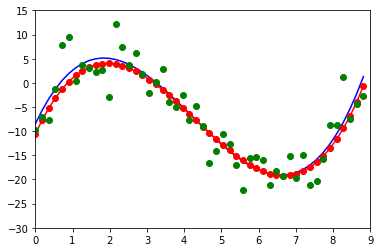

In [7]:
def get_y_estimated(w):
    p = np.poly1d(np.flip(w))
    y_estimated = p(x)
    return y_estimated

y_estimated = get_y_estimated(x_w)

# construct the polynomial function
def plot_ploy(x, y, y_estimated, b, x_w, x_begin, x_end, y_begin, y_end):
    plt.plot(x, y_estimated, color = 'b')
    plt.plot(x, y, color = 'r')
    plt.plot(x, y, 'ro')
    plt.plot(x, b, 'go')
    plt.axis([x_begin, x_end, y_begin, y_end])
    plt.show()
    
plot_ploy(x, y, y_estimated, b, x_w, 0, 9, -30, 15)